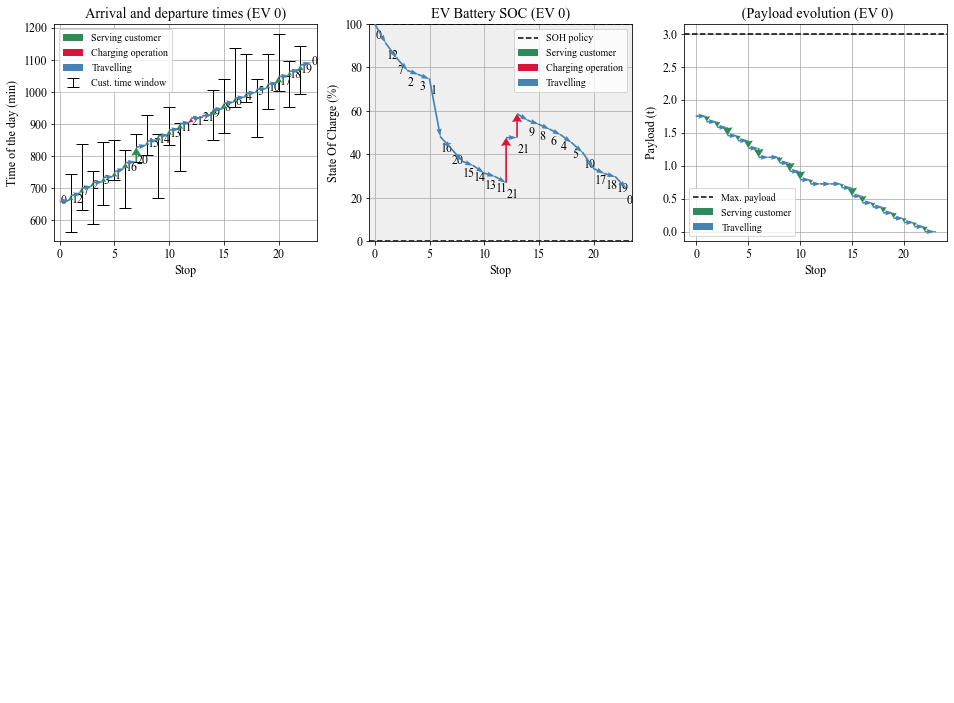

In [3]:
import sys

import pandas as pd

sys.path.append('..')
from models.Fleet import  from_xml
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = '12'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

#instance_folder = '../data/XML_files/35C_2CS_1D_3EV_4CAP/'
instance_folder = '../data/real_data/'
opt_res_folder = f'{instance_folder}01-07-2020_13-40-15_FEASIBLE_ASSIGNATION'
#opt_res_folder = f'{instance_folder}(soh40_80)22-06-2020_13-12-06_FEASIBLE_ASSIGNATION'

fleet = from_xml(f'{instance_folder}21nodes_NOPOLICY_1EV.xml', assign_customers=False)
fleet_size = len(fleet.vehicles)

routes = {}
for i in range(fleet_size):
    ev_file = f'{opt_res_folder}/EV{i}_operation.csv'
    df = pd.read_csv(ev_file)
    Sk = tuple(df['Sk'])
    Lk = tuple(df['Lk'])
    x1_0 = df['x1_reaching'].iloc[0]
    x2_0 = df['x2_reaching'].iloc[0]
    x3_0 = df['x3_reaching'].iloc[0]
    routes[i] = ((Sk, Lk), x1_0, x2_0, x3_0)

fleet.set_routes_of_vehicles(routes)
fleet.create_optimization_vector()


plots = fleet.plot_operation_pyplot(label_offset=(.05, -7), fig_size=(16,4), save_to=opt_res_folder+'/')

In [2]:
from bokeh.io import output_notebook
output_notebook()
#fleet.plot_operation()

Loading BokehJS ...

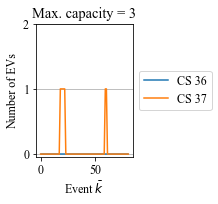

In [12]:
import matplotlib.pyplot as plt

folder = '../data/GA_implementation_xml/35C_2CS_1D_3EV_4CAP/'
folder_opt = '24-05-2020_16-07-38_FEASIBLE_ASSIGNED/'
file_path = folder + folder_opt + 'nodes_occupation.csv'
fig_path = folder + folder_opt + 'occupation1_legend.pdf'
df = pd.read_csv(file_path)
plot = df[['36', '37']].plot(yticks=[0,1,2], figsize=(3.2,3), legend=False)
plt.grid(axis='y')
plt.xlabel(r'Event $\bar{k}$')
plt.ylabel(r'Number of EVs')
plt.title('Max. capacity = 3')
plt.legend(('CS 36', 'CS 37'), loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig(fig_path)

(<Figure size 432x288 with 1 Axes>,
 <networkx.classes.digraph.DiGraph at 0x1e32343d388>)

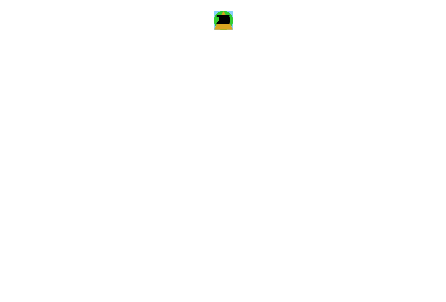

In [11]:
fleet.draw_operation(color_route=('r', 'b', 'g', 'c', 'y'), save_to=None, width=0.02, edge_color='grey', 
                     markeredgecolor='black', markeredgewidth=2.0)